In [ ]:
import numpy as np
from keras import Sequential, layers
from keras import datasets
from keras.utils import to_categorical
from keras.metricsa import TopKCategoricalAccuracy

import matplotlib.pyplot as plt

## 1- Data Preparation

In [2]:
(train_data, train_labels), (test_data, test_labels) = datasets.reuters.load_data(
    num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
word_index = datasets.reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [4]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
def multihot_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [ ]:
x_train = multihot_sequences(train_data)
x_test = multihot_sequences(test_data)

In [7]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [8]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## 2- Model Design

In [10]:
model = Sequential([
    layers.Input(shape=(10_000,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │         640,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 46)                  │           2,990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 647,214 (2.47 MB)

 Trainable params: 647,214 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

## 3- Training

In [ ]:
top_3_accuracy = TopKCategoricalAccuracy(k=3, name="top_3_accuracy")

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy", top_3_accuracy])

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.2213 - loss: 3.5398 - val_accuracy: 0.3980 - val_loss: 2.5991
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.5316 - loss: 2.2318 - val_accuracy: 0.6570 - val_loss: 1.6306
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.7071 - loss: 1.4187 - val_accuracy: 0.7240 - val_loss: 1.2805
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.7775 - loss: 1.0544 - val_accuracy: 0.7650 - val_loss: 1.1336
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.8273 - loss: 0.8323 - val_accuracy: 0.7900 - val_loss: 1.0370
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.8657 - loss: 0.6370 - val_accuracy: 0.8060 - val_loss: 0.9671
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8975 - loss: 0.5008 - val_accuracy: 0.8090 - val_loss: 0.9316
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9121 - loss: 0.4181 - val_accuracy: 0.8050 -

## 4- Evaluation

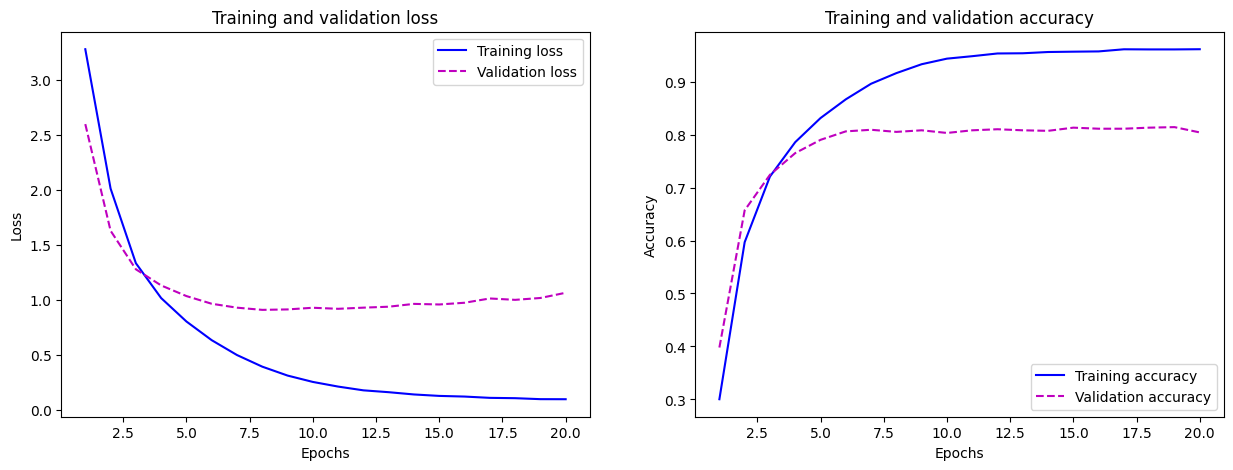

In [13]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(loss) + 1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(epochs, loss, "b", label="Training loss")
axes[0].plot(epochs, val_loss, "m--", label="Validation loss")
axes[1].plot(epochs, acc, "b", label="Training accuracy")
axes[1].plot(epochs, val_acc, "m--", label="Validation accuracy")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[0].legend()
axes[1].legend()
axes[0].set_title("Training and validation loss")
axes[1].set_title("Training and validation accuracy")
plt.show()

In [14]:
results = model.evaluate(x_test, y_test)
print(results)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7982 - loss: 1.1236
[1.1728028059005737, 0.7902938723564148]


In [16]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [20]:
predictions[0].argmax()

3

In [22]:
y_test[0].argmax()

3

### Create random baseline to compare

In [15]:
import copy
test_labels_copy = copy.copy(test_labels)
outputs = []
for i in range(100):
    np.random.shuffle(test_labels_copy)
    hits_array = np.array(test_labels) == np.array(test_labels_copy)
    outputs.append(hits_array.mean())

np.array(outputs).mean()

0.187506678539626